# TSP's Parameters Sensitivity
### Information and Decision Systems Group<br>University of Chile

Implementation of the sensititivy analysis of the TSP's parameters presented by [Gonzales et al. (2021)](https://arxiv.org/pdf/2110.14122.pdf). 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, '../src/build')
from TSP import TSP
sys.path.insert(1, './utils')
from distributions import *

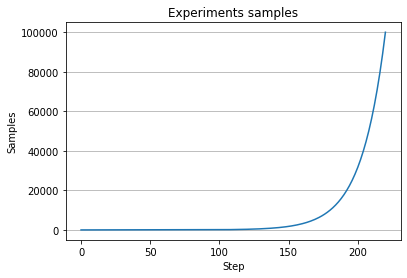

In [2]:
# Number of samples per step
samples = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
                    26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 
                    49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 
                    72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 
                    95, 96, 97, 98, 99, 100, 101, 107, 114, 120, 127, 135, 143, 151, 160, 169, 179, 190, 201, 
                    213, 225, 239, 253, 268, 283, 300, 318, 336, 356, 377, 400, 423, 448, 475, 503, 532, 564, 
                    597, 632, 670, 709, 751, 796, 843, 893, 946, 1001, 1061, 1124, 1190, 1260, 1335, 1414, 1498,
                    1586, 1680, 1780, 1885, 1997, 2115, 2240, 2373, 2513, 2662, 2820, 2987, 3164, 3351, 3550, 
                    3760, 3983, 4218, 4468, 4733, 5013, 5310, 5625, 5958, 6311, 6685, 7081, 7500, 7945, 8415, 
                    8914, 9442, 10001, 10594, 11222, 11887, 12591, 13337, 14127, 14964, 15850, 16790, 17784, 
                    18838, 19954, 21136, 22389, 23715, 25120, 26609, 28185, 29855, 31624, 33498, 35483, 37585, 
                    39812, 42171, 44670, 47317, 50120, 53090, 56236, 59568, 63097, 66836, 70796, 74991, 79434, 
                    84141, 89127, 94408, 100001])
n_samples = samples[-1]
plt.plot(samples)
plt.title('Experiments samples')
plt.xlabel('Step')
plt.ylabel('Samples')
plt.grid(axis='y')
plt.show()

## TSP $\alpha$-parameter sensivity

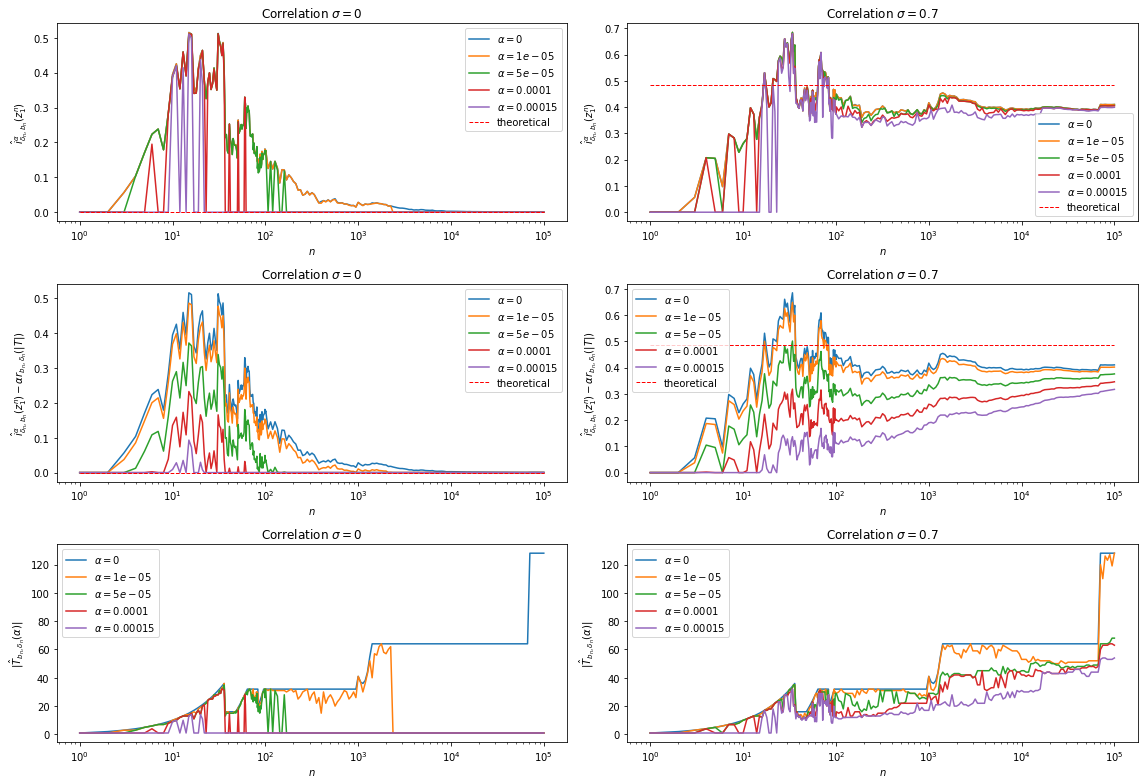

In [3]:
# TSP parameters
l_bn = 0.167
w_bn = 0.05
lambdas = [0, 1e-5, 5e-5, 0.0001, 0.00015]
# Experimental setting
dist = gaussian_dist
dim = 1
correlations = [0, 0.7]
# TSP - tree sizes
lambda_sizes = []
# TSP - full tree estimated mutual informations
lambda_emis = []
# TSP - regularized tree mutual informations
lambda_reg_emis = []

# Experiments
for corr in correlations:
    sizes = []
    emis = []
    reg_emis = []
    _, X, Y, mi = dist(dim, corr, n_samples)
    for l in lambdas:
        l_sizes = []
        l_emis = []
        l_reg_emis = []
        tsp = TSP(l_bn, w_bn, l)
        for i in samples:
            tsp.grow(np.copy(X[:i], order='F'), np.copy(Y[:i], order='F'))
            if l != 0:
                tsp.regularize()
            l_emis.append(tsp.emi())
            l_sizes.append(tsp.size())
            l_reg_emis.append(tsp.reg_emi())
        emis.append(l_emis)
        reg_emis.append(l_reg_emis)
        sizes.append(l_sizes)
    lambda_sizes.append(sizes)
    lambda_emis.append(emis)
    lambda_reg_emis.append(reg_emis)
    
# Plots
cnt = 0
fig = plt.figure(figsize=(16,11))
for i in range(len(correlations)):
    cnt += 1
    plt.subplot(3, 2, cnt)
    for j in range(len(lambdas)):
        plt.plot(samples, lambda_emis[i][j], label=r'$\alpha={}$'.format(lambdas[j]))
    plt.plot(samples, 
             gaussian_dist(dim, correlations[i], n_samples)[-1] * np.ones(len(lambda_emis[i][j])), 
             '--', label='theoretical', color='r', linewidth=1)
    plt.xscale('log')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\hat{i}^\alpha_{\delta_n,b_n}(z^n_1)$')
    plt.title(r'Correlation $\sigma={}$'.format(correlations[i]))
    plt.legend()
for i in range(len(correlations)):
    cnt += 1
    plt.subplot(3, 2, cnt)
    for j in range(len(lambdas)):
        plt.plot(samples, lambda_reg_emis[i][j], label=r'$\alpha={}$'.format(lambdas[j]))
    plt.plot(samples, 
             gaussian_dist(dim, correlations[i], n_samples)[-1] * np.ones(len(lambda_emis[i][j])), 
             '--', label='theoretical', color='r', linewidth=1)
    plt.xscale('log')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\hat{i}^\alpha_{\delta_n,b_n}(z^n_1) - \alpha r_{b_n, \delta_n}(\left| T \right|)$')
    plt.title(r'Correlation $\sigma={}$'.format(correlations[i]))
    plt.legend()
for i in range(len(correlations)):
    cnt += 1
    plt.subplot(3, 2, cnt)
    for j in range(len(lambdas)):
        plt.plot(samples, lambda_sizes[i][j], label=r'$\alpha={}$'.format(lambdas[j]))
    plt.xscale('log')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\hat{T}_{b_n,\delta_n} (\alpha)|$')
    plt.title(r'Correlation $\sigma={}$'.format(correlations[i]))
    plt.legend()
plt.tight_layout()
plt.show()

## TSP $l$-parameter sensivity

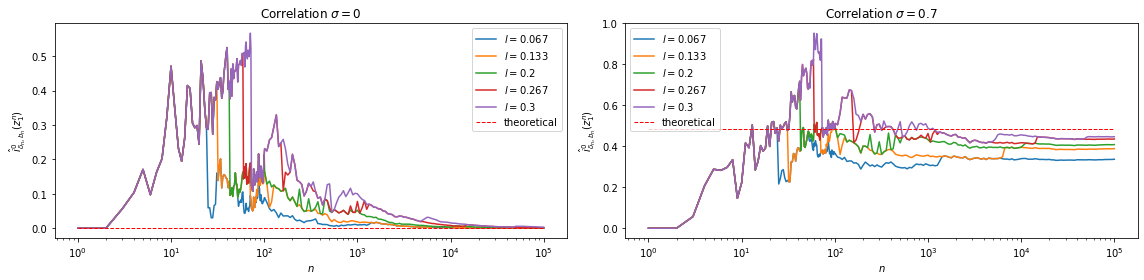

In [4]:
# TSP parameters
l_bns = [0.067, 0.133, 0.2, 0.267, 0.3]
w_bn = 0.05
l = 0
# Experimental setting
dist = gaussian_dist
dim = 1
correlations = [0, 0.7]
# TSP - tree sizes
lbn_sizes = []
# TSP - full tree estimated mutual informations
lbn_emis = []

# Experiments
for corr in correlations:
    sizes = []
    emis = []
    _, X, Y, _ = dist(dim, corr, n_samples)
    for bn in l_bns:
        b_sizes = []
        b_emis = []
        tsp = TSP(bn, w_bn, l)
        for i in samples:
            tsp.grow(np.copy(X[:i], order='F'), np.copy(Y[:i], order='F'))
            if l != 0:
                tsp.regularize()
            b_emis.append(tsp.emi())
            b_sizes.append(tsp.size())
        emis.append(b_emis)
        sizes.append(b_sizes)
    lbn_sizes.append(sizes)
    lbn_emis.append(emis)
    
# Plots
cnt = 0
fig = plt.figure(figsize=(16,4))
for i in range(len(correlations)):
    cnt += 1
    plt.subplot(1, 2, cnt)
    for j in range(len(l_bns)):
        plt.plot(samples, lbn_emis[i][j], label=r'$l={}$'.format(l_bns[j]))
    plt.plot(samples, 
             gaussian_dist(dim, correlations[i], n_samples)[-1] * np.ones(len(lbn_emis[i][j])), 
             '--', label='theoretical', color='r', linewidth=1)
    plt.xscale('log')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\hat{i}^0_{\delta_n,b_n}(z^n_1)$')
    plt.title(r'Correlation $\sigma={}$'.format(correlations[i]))
    plt.legend()
plt.tight_layout()
plt.show()

## TSP $w$-parameter sensivity

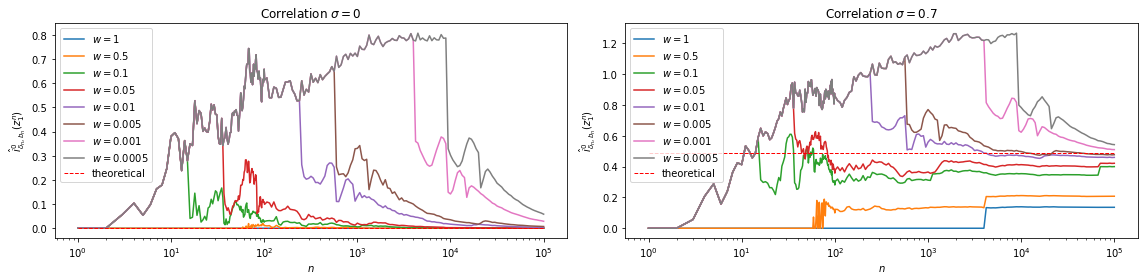

In [5]:
# TSP parameters
l_bn = 0.167
w_bns = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
l = 0
# Experimental setting
dist = gaussian_dist
dim = 1
correlations = [0, 0.7]
# TSP - tree sizes
wbn_sizes = []
# TSP - full tree estimated mutual informations
wbn_emis = []

# Experiments
for corr in correlations:
    sizes = []
    emis = []
    _, X, Y, _ = dist(dim, corr, n_samples)
    for wn in w_bns:
        w_sizes = []
        w_emis = []
        tsp = TSP(l_bn, wn, l)
        for i in samples:
            tsp.grow(np.copy(X[:i], order='F'), np.copy(Y[:i], order='F'))
            if l != 0:
                tsp.regularize()
            w_emis.append(tsp.emi())
            w_sizes.append(tsp.size())
        emis.append(w_emis)
        sizes.append(w_sizes)
    wbn_sizes.append(sizes)
    wbn_emis.append(emis)
    
# Plots    
cnt = 0
fig = plt.figure(figsize=(16,4))
for i in range(len(correlations)):
    cnt += 1
    plt.subplot(1, 2, cnt)
    for j in range(len(w_bns)):
        plt.plot(samples, wbn_emis[i][j], label=r'$w={}$'.format(w_bns[j]))
    plt.plot(samples, 
             gaussian_dist(dim, correlations[i], n_samples)[-1] * np.ones(len(wbn_emis[i][j])), 
             '--', label='theoretical', color='r', linewidth=1)
    plt.xscale('log')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\hat{i}^0_{\delta_n,b_n}(z^n_1)$')
    plt.title(r'Correlation $\sigma={}$'.format(correlations[i]))
    plt.legend()
plt.tight_layout()
plt.show()